In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def display_img(img, cmap='gray'):
  fig = plt.figure(figsize=(12, 10))
  ax = fig.add_subplot(111)
  ax.imshow(img, cmap='gray')

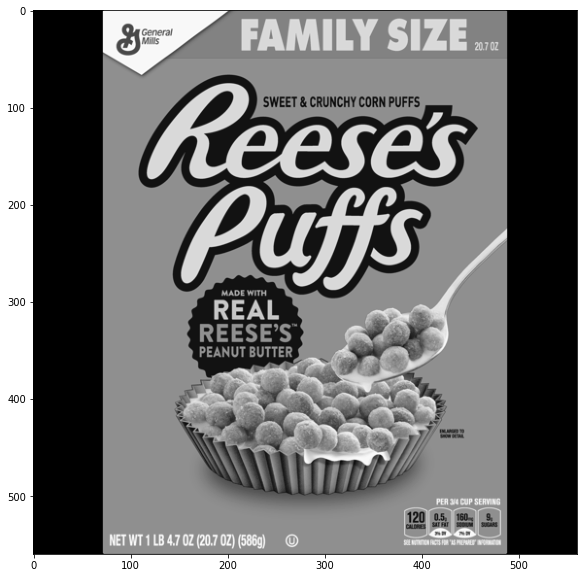

In [3]:
reeses = cv2.imread('/content/reeses_puffs.png', 0)
display_img(reeses)

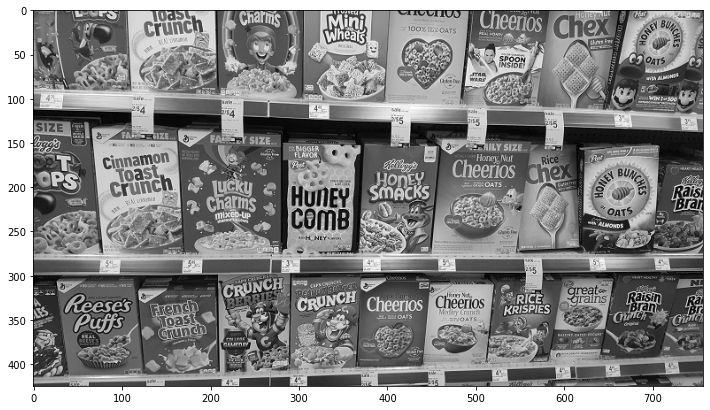

In [4]:
cereals = cv2.imread('/content/many_cereals.jpg', 0)
display_img(cereals)

In [0]:
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(reeses, None)
kp2, des2 = orb.detectAndCompute(cereals, None) 

In [0]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [0]:
matches = bf.match(des1, des2)

In [0]:
matches = sorted(matches, key=lambda x : x.distance)

In [0]:
reeses_matches = cv2.drawMatches(reeses, kp1, cereals, kp2, matches[:25], None, flags=2)

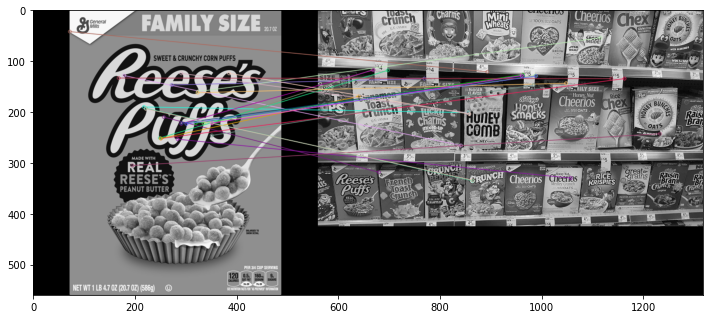

In [10]:
display_img(reeses_matches)

In [0]:
sift = cv2.xfeatures2d.SIFT_create()

In [0]:
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [0]:
bf = cv2.BFMatcher()

In [0]:
matches = bf.knnMatch(des1, des2, k=2)

In [0]:
good = []

for match1, match2 in matches:
  if match1.distance < 0.75*match2.distance:
    good.append([match1])

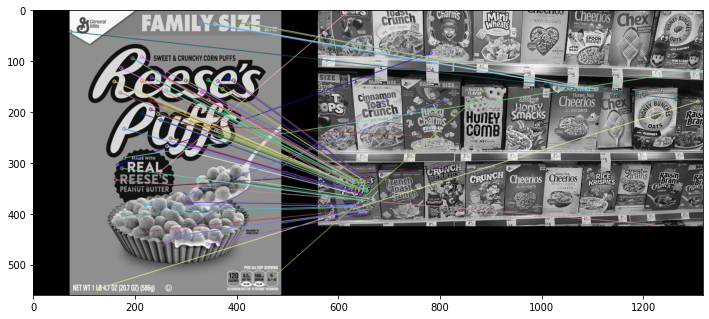

In [19]:
sift_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=2)
display_img(sift_matches)

In [0]:
sift = cv2.xfeatures2d.SIFT_create()

In [0]:
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [0]:
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

In [0]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [0]:
matches = flann.knnMatch(des1, des2, k=2)

In [0]:
matches_mask = [[0, 0] for i in range(len(matches))]

In [0]:
for i, (match1, match2) in enumerate(matches):
  if match1.distance < 0.75*match2.distance:
    matches_mask[i] = [1, 0]

In [0]:
draw_params = dict(matchColor=(0, 0, 255), singlePointColor=(255, 0, 0), matchesMask=matches_mask, flags=0)

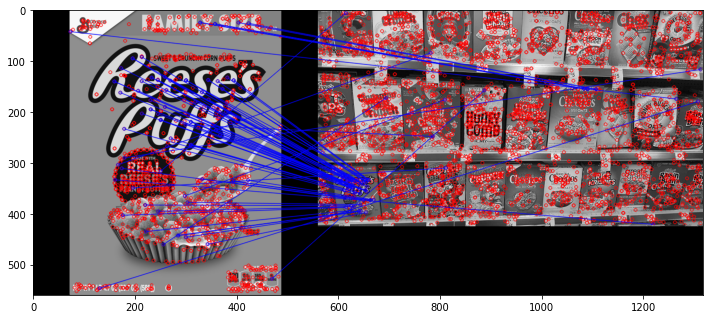

In [48]:
flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, matches, None, **draw_params)
display_img(flann_matches)